A.3 Seeing models as computation graphs

Now let’s look at PyTorch’s `automatic differentiation engine`, also known as `autograd`. PyTorch’s autograd system provides functions to compute gradients in dynamic computational graphs automatically.

A `computational graph` is a directed graph that allows us to express and visualise mathematical expressions. In the context of deep learning, a computation graph lays out the sequence of calculations needed to compute the output of a neural network — we will need this to compute the required gradients for `backpropagation`, the main training algorithm for neural networks.

**What is Autograd?**


1.   PyTorch's automatic differentiation engine
2.   Computes gradients automatically for training neural networks
3.   Tracks operations on tensors and builds a computational graph


**What is Computational Graph?**

1. Created dynamically during forward pass
2. Each operation becomes a node in the graph
3. Edges represent data flow and dependencies

  








Let’s look at a concrete example to illustrate the concept of a computation graph.

The code in the following listing implements the `forward pass` (`prediction` step) of a simple logistic regression classifier, which can be seen as a single-layer neural network. It returns a score between 0 and 1, which is compared to the true class label (0 or 1) when computing the loss.

In [5]:
#  A logistic regression forward pass
import torch
import torch.nn.functional as F

y = torch.tensor([1.0])  # True label (target)
x1 = torch.tensor([1.1]) # Input feature
w1 = torch.tensor([2.2]) # Weight
b = torch.tensor([0.0])  # Bias

z = w1 * x1 + b
# Activation Function - The sigmoid function transforms z into a probability
# between 0 and 1. a ≈ 0.918 (predicted probability)
a = torch.sigmoid(z)
# Loss Calculation (Binary Cross-Entropy) -->
# BCE = −[ylog(a) + (1 − y)log(1 − a)]
loss = F.binary_cross_entropy(a, y)
print(f"Loss is: {loss}" )

Loss is: 0.0851878821849823


The point of this example is not to implement a logistic regression classifier but rather to illustrate how we can think of a sequence of computations as a computation graph, as shown in figure below.

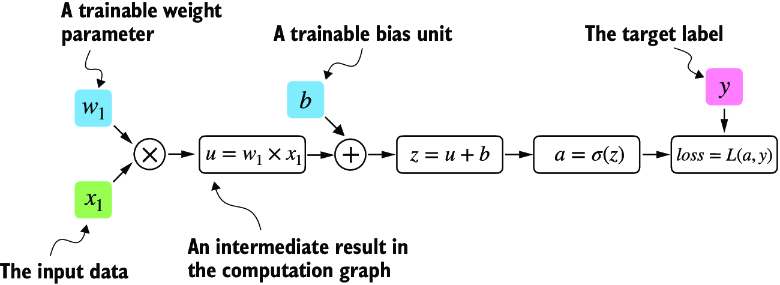

In [9]:
from IPython.display import Image
Image('/content/drive/MyDrive/Data science/Build a Large Language Model (From Scratch)/Pytorch/images/LR-forwardPass.png')

In [18]:
from IPython.display import HTML
#image_url = '/content/drive/MyDrive/Data science/Build a Large Language Model (From Scratch)/Pytorch/images/LR-forwardPass.png'
image_url = 'https://drive.google.com/file/d/1McWs_9wu7SFPvMEn03YmQ8aafq8AMQ8F/view?usp=drive_link'
alt_text = ' A logistic regression forward pass as a computation graph. The input feature x1 is multiplied by a model weight w1 and passed through an activation function s after adding the bias. The loss is computed by comparing the model output a with a given label y.'
html_code = f'<img src="{image_url}" alt="{alt_text}" style="max-width: 100%; height: auto;">'
display(HTML(html_code))

In fact, PyTorch builds such a computation graph in the background, and we can use this to calculate gradients of a loss function with respect to the model parameters (here w1 and b) to train the model.